**Example**: "Learning" via memorization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Generate 10000 points in a square with area 2 (side length 1).

In [2]:
def gen_data(N):
    x = np.zeros((N,2))
    x[:,0] = np.random.uniform(0,1,(N,))
    x[:,1] = np.random.uniform(0,1,(N,))
    return x

(-0.049764579352611707,
 1.0496245800672159,
 -0.049978487931781584,
 1.0499800470672085)

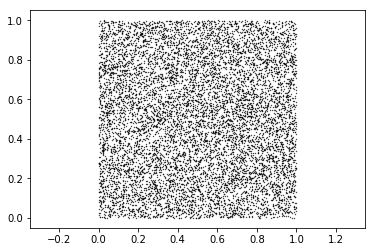

In [31]:
N_train = 10000
X_train = gen_data(N_train)
plt.plot(X_train[:,0],X_train[:,1],'.',c='black', ms=0.7)
plt.axis('equal')

Quickly compute the coordinates of a square of area 1 inside.

In [4]:
t0 = (1-np.sqrt(0.5))/2
t1 = t0+np.sqrt(0.5)

Implement our ground truth function that assigns, to each point, label 1 if it lies inside the square of area 1 and 0 otherwise.

In [5]:
def f(X):
    N = X.shape[0]
    labels = np.zeros((N,),np.int)
    for i in np.arange(N):
        if X[i,0]>=t0 and X[i,0]<=t1:
            if X[i,1]>=t0 and X[i,1]<=t1:
                labels[i] = 1
    return labels

Execute the labeling function on our training data.

(-0.04998930377997024,
 1.0499314305771468,
 -0.04980582886885862,
 1.0498988616032312)

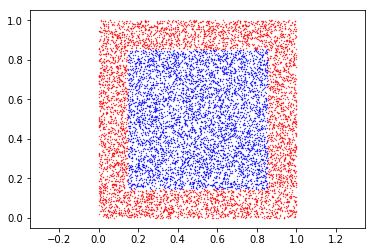

In [30]:
L_train = f(X_train)

# plot labeling w.r.t. ground truth function f
L_train_1_idx = np.where(L_train==1)[0]
L_train_0_idx = np.where(L_train==0)[0]
plt.plot(X_train[L_train_1_idx,0],X_train[L_train_1_idx,1],'.',c='blue',ms=0.7)
plt.plot(X_train[L_train_0_idx,0],X_train[L_train_0_idx,1],'.',c='red',ms=0.7)
plt.axis('equal')

Implement the "memorization" classifier.

In [8]:
def classifier(X,labels,point):
    p0 = np.where(point[0] == X[:,0])[0]
    p1 = np.where(point[1] == X[:,1])[0]
    if len(p0)>0 and len(p1)>0 and p0==p1:
        return labels[p0[0]]
    else:
        return 0

Create new points, randomly drawn from our square of area 2.

In [9]:
N_test = 10000
X_test = gen_data(N_test)

Execute the labeling function (for evaluation purposes) and run the classifier on these new points.

In [10]:
test = f(X_test)
pred = np.zeros((N_test,))
for i in np.arange(N_test):
    pred[i] = classifier(X_train,L_train,X_test[i,:])

Compute the accuracy of this classifier.

In [11]:
print "{}%".format(100*float(len(np.where(pred==test)[0]))/N_test)

49.49%
